#Importanto libs e dataset

In [6]:
!pip install scikit_posthocs

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from pathlib import Path
from itertools import combinations

from scipy.stats import friedmanchisquare
import scikit_posthocs as sp # Para os testes post-hoc

# aumentar o range de um texto nas colunas
pd.set_option('display.max_colwidth', None)

In [8]:
results_path = Path("results")
results_path.exists()

True

In [9]:
rq2_table_path = results_path / 'rq2_table.xlsx'

rq2_table_civil = pd.read_excel(rq2_table_path, index_col=0, header=[0, 1], sheet_name='Civil')
rq2_table_uncivil = pd.read_excel(rq2_table_path, index_col=0, header=[0, 1], sheet_name='Uncivil')
rq2_table_civil

Scenario         zero_shot                  one_shot                  \
Metric           precision recall f1-score precision recall f1-score   
phi4_14b             0.805  0.953    0.872     0.819  0.936    0.874   
deepseek-r1_14b      0.781  0.974    0.867     0.736  0.996    0.846   
mistral-nemo_12b     0.819  0.923    0.868     0.846  0.776    0.810   
gemma2_9b            0.834  0.881    0.857     0.826  0.907    0.864   
llama3.1_8b          0.824  0.895    0.858     0.799  0.933    0.861   
deepseek-r1_8b       0.726  0.999    0.841     0.739  0.989    0.846   
gemma_7b             0.814  0.705    0.756     0.842  0.547    0.663   
mistral_7b           0.759  0.983    0.857     0.808  0.934    0.866   
llama3.2_3b          0.841  0.642    0.728     0.849  0.735    0.788   
gpt-4o-mini          0.825  0.946    0.881     0.834  0.923    0.876   

Scenario          few_shot                  auto_cot                  \
Metric           precision recall f1-score precision recall f1-score   
phi4_14b             0.824  0.928    0.873     0.807  0.952    0.873   
deepseek-r1_14b      0.736  0.996    0.846     0.771  0.981    0.863   
mistral-nemo_12b     0.836  0.806    0.821     0.810  0.928    0.865   
gemma2_9b            0.823  0.915    0.867     0.834  0.888    0.860   
llama3.1_8b          0.788  0.948    0.861     0.801  0.943    0.866   
deepseek-r1_8b       0.756  0.943    0.839     0.772  0.963    0.857   
gemma_7b             0.840  0.592    0.694     0.836  0.654    0.734   
mistral_7b           0.811  0.927    0.865     0.766  0.978    0.859   
llama3.2_3b          0.786  0.929    0.852     0.861  0.556    0.676   
gpt-4o-mini          0.834  0.929    0.879     0.830  0.934    0.879   

Scenario         role_based                  
Metric            precision recall f1-score  
phi4_14b              0.832  0.917    0.872  
deepseek-r1_14b       0.819  0.948    0.879  
mistral-nemo_12b      0.859  0.838    0.849  
gemma2_9b             0.818  0.930    0.870  
llama3.1_8b           0.840  0.906    0.872  
deepseek-r1_8b        0.741  0.995    0.850  
gemma_7b              0.821  0.902    0.860  
mistral_7b            0.777  0.974    0.864  
llama3.2_3b           0.857  0.781    0.817  
gpt-4o-mini           0.854  0.920    0.886

In [10]:
rq2_table_uncivil


Scenario         zero_shot                  one_shot                  \
Metric           precision recall f1-score precision recall f1-score   
phi4_14b             0.772  0.409    0.535     0.743  0.472    0.577   
deepseek-r1_14b      0.817  0.300    0.439     0.885  0.087    0.159   
mistral-nemo_12b     0.709  0.478    0.571     0.528  0.640    0.579   
gemma2_9b            0.644  0.551    0.594     0.682  0.511    0.585   
llama3.1_8b          0.656  0.512    0.575     0.700  0.399    0.508   
deepseek-r1_8b       0.910  0.037    0.071     0.793  0.107    0.189   
gemma_7b             0.439  0.588    0.503     0.389  0.738    0.510   
mistral_7b           0.826  0.201    0.323     0.719  0.431    0.539   
llama3.2_3b          0.430  0.689    0.529     0.496  0.664    0.568   
gpt-4o-mini          0.778  0.486    0.598     0.729  0.529    0.613   

Scenario          few_shot                  auto_cot                  \
Metric           precision recall f1-score precision recall f1-score   
phi4_14b             0.728  0.492    0.587     0.772  0.418    0.543   
deepseek-r1_14b      0.885  0.088    0.160     0.839  0.255    0.392   
mistral-nemo_12b     0.546  0.597    0.571     0.708  0.444    0.545   
gemma2_9b            0.696  0.498    0.581     0.657  0.548    0.597   
llama3.1_8b          0.723  0.347    0.469     0.733  0.401    0.519   
deepseek-r1_8b       0.602  0.221    0.323     0.743  0.275    0.401   
gemma_7b             0.405  0.711    0.516     0.432  0.672    0.526   
mistral_7b           0.706  0.448    0.548     0.811  0.237    0.367   
llama3.2_3b          0.661  0.355    0.462     0.404  0.770    0.530   
gpt-4o-mini          0.743  0.526    0.616     0.753  0.512    0.610   

Scenario         role_based                  
Metric            precision recall f1-score  
phi4_14b              0.712  0.526    0.605  
deepseek-r1_14b       0.778  0.464    0.582  
mistral-nemo_12b      0.611  0.649    0.629  
gemma2_9b             0.724  0.472    0.571  
llama3.1_8b           0.699  0.557    0.620  
deepseek-r1_8b        0.901  0.113    0.200  
gemma_7b              0.666  0.499    0.570  
mistral_7b            0.812  0.284    0.421  
llama3.2_3b           0.544  0.666    0.599  
gpt-4o-mini           0.744  0.598    0.663

In [11]:
rq2_table_f1_scores_civil = rq2_table_civil.loc[:, (slice(None), 'f1-score')]
rq2_table_f1_scores_uncivil = rq2_table_uncivil.loc[:, (slice(None), 'f1-score')]

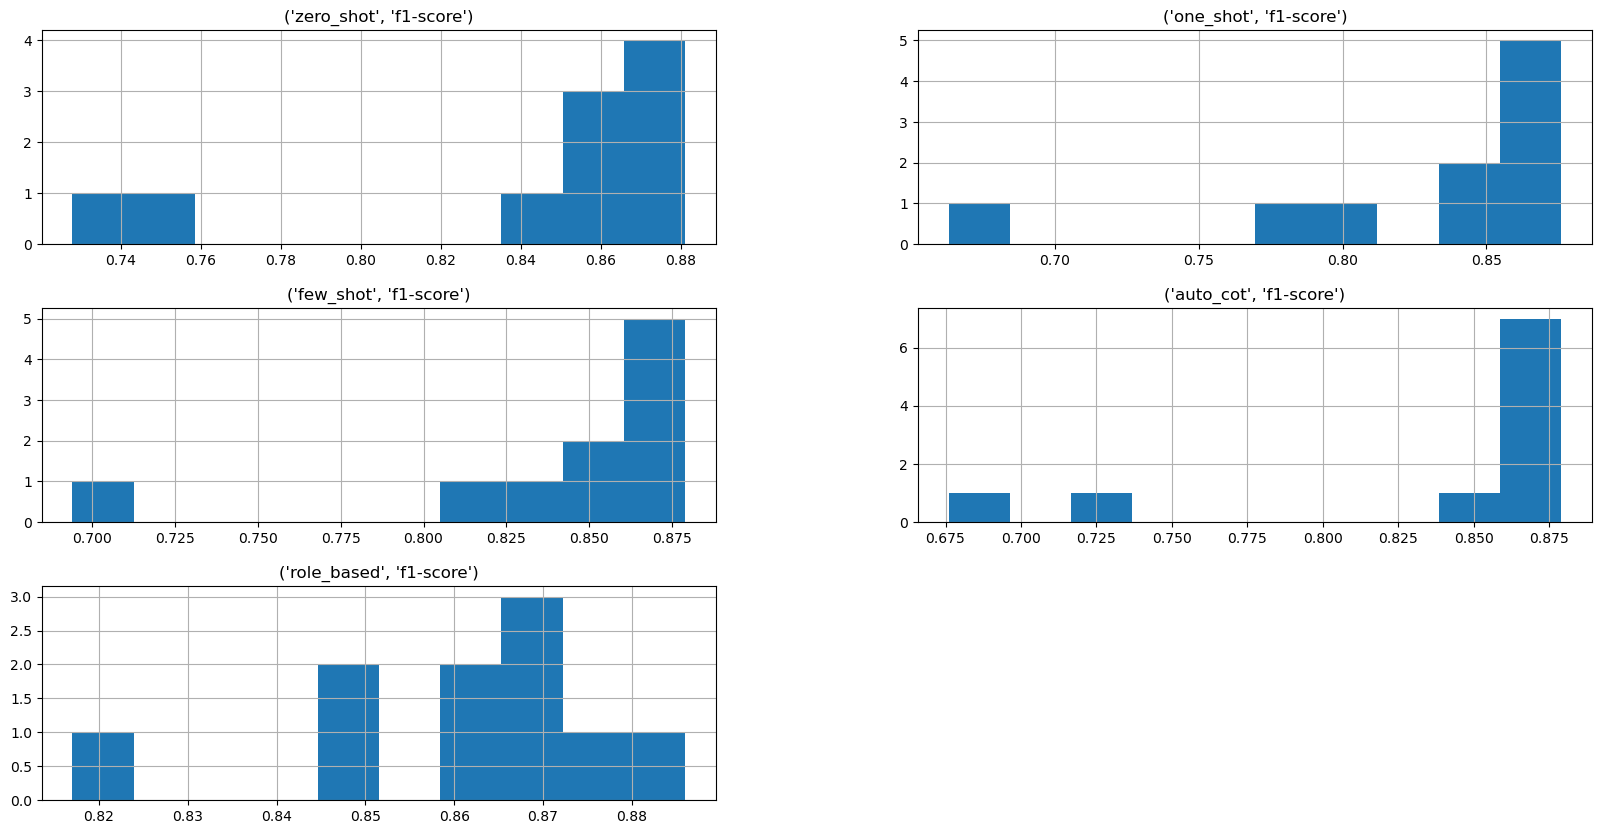

In [12]:
rq2_table_f1_scores_civil.hist(figsize=(20, 10));

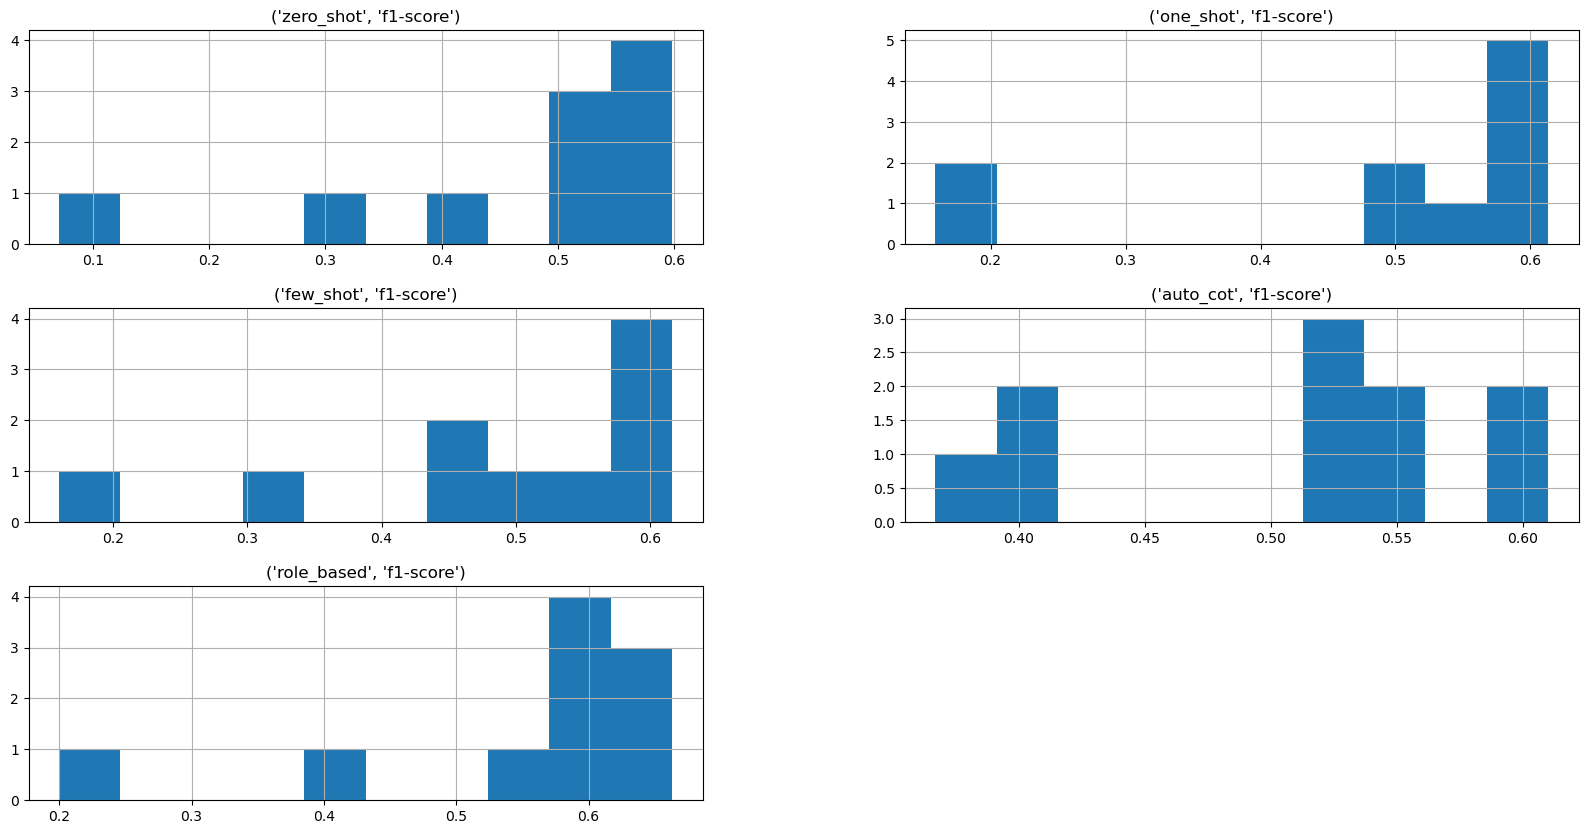

In [13]:
rq2_table_f1_scores_uncivil.hist(figsize=(20, 10));

In [14]:
f1_civil_data = rq2_table_f1_scores_civil.to_numpy()
f1_uncivil_data = rq2_table_f1_scores_uncivil.to_numpy()

#Teste de Friedman e Nemenyi

## Hipóteses para Análise Estatística de Estratégias de Prompt

Este documento detalha as hipóteses estatísticas para a avaliação das estratégias de prompt (Zero-shot, One-shot, Few-shot, Auto-CoT, Role-based) em Modelos de Linguagem de Grande Escala (SLMs), utilizando o Teste de Friedman e os testes post-hoc de Nemenyi. As análises serão realizadas separadamente para as F1-scores da classe "Civil" e da classe "Uncivil".

---

### 1. Hipóteses para o Teste de Friedman

O Teste de Friedman é um teste não paramétrico utilizado para determinar se há uma diferença estatisticamente significativa entre as medianas de três ou mais grupos relacionados (neste caso, as estratégias de prompt), onde cada grupo é medido nas mesmas condições ou sujeitos (os modelos SLM).

#### 1.1. Hipótese Nula ($H_0$)

Não há diferença estatisticamente significativa nas medianas das F1-scores entre as diferentes estratégias de prompt. Isso implica que o desempenho mediano de todas as estratégias é o mesmo.

$H_0: \text{mediana}(F1_{S_1}) = \text{mediana}(F1_{S_2}) = \text{mediana}(F1_{S_3}) = \text{mediana}(F1_{S_4}) = \text{mediana}(F1_{S_5})$

*Onde $S_1$ a $S_5$ representam as estratégias Zero-shot, One-shot, Few-shot, Auto-CoT e Role-based, respectivamente.*

#### 1.2. Hipótese Alternativa ($H_1$)

Há pelo menos uma estratégia de prompt cuja mediana da F1-score é estatisticamente diferente das outras. Isso significa que o desempenho mediano de pelo menos uma estratégia difere das demais.

$H_1: \text{A mediana de pelo menos uma estratégia de prompt difere das outras.}$
(Formalmente: Não é verdade que $\text{mediana}(F1_{S_1}) = \text{mediana}(F1_{S_2}) = \text{mediana}(F1_{S_3}) = \text{mediana}(F1_{S_4}) = \text{mediana}(F1_{S_5})$)

---

### 2. Hipóteses para os Testes Post-Hoc de Nemenyi

Se o Teste de Friedman resultar em um p-valor menor que o nível de significância ($\alpha$), indicando que há uma diferença geral, os testes post-hoc de Nemenyi são então realizados para identificar quais pares específicos de estratégias são significativamente diferentes. Para cada par de estratégias ($S_A$ e $S_B$), as hipóteses serão formuladas como segue:

#### 2.1. Hipótese Nula ($H_0$)

A mediana da diferença nas F1-scores entre a estratégia $S_A$ e a estratégia $S_B$ é zero. Não há diferença estatisticamente significativa no desempenho mediano entre as duas estratégias comparadas.

$H_0: \text{mediana}(F1_{S_A} - F1_{S_B}) = 0$

#### 2.2. Hipótese Alternativa ($H_1$)

A mediana da diferença nas F1-scores entre a estratégia $S_A$ e a estratégia $S_B$ não é zero. Há uma diferença estatisticamente significativa no desempenho mediano entre as duas estratégias comparadas.

$H_1: \text{mediana}(F1_{S_A} - F1_{S_B}) \neq 0$

---

**Observações Importantes:**

* As hipóteses acima serão testadas **separadamente** para os F1-scores da classe "Civil" e para os F1-scores da classe "Uncivil".
* Os p-valores dos testes post-hoc de Nemenyi já são **ajustados** para controlar a taxa de erro de Tipo I (falsos positivos) que surge devido à realização de múltiplas comparações.

In [15]:
# Nível de significância
alpha = 0.05

# Nomes das estratégias (para facilitar a interpretação dos resultados)
strategies = ['Zero-shot', 'One-shot', 'Few-shot', 'Auto-CoT', 'Role-based']

# --- Função para realizar o Teste de Friedman e Nemenyi ---
def run_friedman_analysis(data, class_name, strategy_labels, alpha):
    print(f"\n📊 Análise para a classe: {class_name}")

    # Aplica o teste de Friedman
    stat, p_value = friedmanchisquare(*data.T)
    print(f"Friedman: chi² = {stat:.4f}, p = {p_value:.4f}")

    if p_value < alpha:
        print("🔍 Diferença significativa detectada. Realizando teste de Nemenyi...")
        nemenyi = sp.posthoc_nemenyi_friedman(data)
        nemenyi.columns = strategy_labels
        nemenyi.index = strategy_labels
        print("\n📌 Matriz de p-valores (teste de Nemenyi):")
        print(nemenyi.round(4))

        print("\n🚩 Estratégias com diferença significativa (p < 0.05):")
        significant_pairs = []
        for i in range(len(strategy_labels)):
            for j in range(i+1, len(strategy_labels)):
                p = nemenyi.iloc[i, j]
                if p < alpha:
                    print(f"- {strategy_labels[i]} vs {strategy_labels[j]} (p = {p:.4f})")
                    significant_pairs.append((strategy_labels[i], strategy_labels[j]))
        if not significant_pairs:
            print("Nenhuma diferença significativa detectada entre pares.")
    else:
        print("✅ Não há diferença estatisticamente significativa entre as estratégias.")

# --- Executar a análise para a Classe Civil ---
run_friedman_analysis(f1_civil_data, "Civil", strategies, alpha)

# --- Executar a análise para a Classe Uncivil ---
run_friedman_analysis(f1_uncivil_data, "Uncivil", strategies, alpha)


📊 Análise para a classe: Civil
Friedman: chi² = 6.1744, p = 0.1865
✅ Não há diferença estatisticamente significativa entre as estratégias.

📊 Análise para a classe: Uncivil
Friedman: chi² = 8.9447, p = 0.0625
✅ Não há diferença estatisticamente significativa entre as estratégias.


In [16]:
def realizar_teste(metrica='f1-score'):
    rq2_table_metrica_civil = rq2_table_civil.loc[:, (slice(None), metrica)]
    rq2_table_metrica_uncivil = rq2_table_uncivil.loc[:, (slice(None), metrica)]

    civil_data = rq2_table_metrica_civil.to_numpy()
    uncivil_data = rq2_table_metrica_uncivil.to_numpy()

    # --- Executar a análise para a Classe Civil ---
    run_friedman_analysis(civil_data, 'Civil', strategies, alpha)

    # --- Executar a análise para a Classe Univil ---
    run_friedman_analysis(uncivil_data, 'Uncivil', strategies, alpha)

def realizar_teste_modelos(metrica='f1-score'):
    rq2_table_metrica_civil = rq2_table_civil.loc[:, (slice(None), metrica)]
    rq2_table_metrica_uncivil = rq2_table_uncivil.loc[:, (slice(None), metrica)]

    civil_data = rq2_table_metrica_civil.T.to_numpy()
    uncivil_data = rq2_table_metrica_uncivil.T.to_numpy()

    # --- Executar a análise para a Classe Civil ---
    run_friedman_analysis(civil_data, 'Civil', rq2_table_metrica_civil.index, alpha)

    # --- Executar a análise para a Classe Univil ---
    run_friedman_analysis(uncivil_data, 'Uncivil', rq2_table_metrica_civil.index, alpha)

In [17]:
print("Teste para Precisão")
realizar_teste('precision')

Teste para Precisão

📊 Análise para a classe: Civil
Friedman: chi² = 5.6244, p = 0.2290
✅ Não há diferença estatisticamente significativa entre as estratégias.

📊 Análise para a classe: Uncivil
Friedman: chi² = 2.5455, p = 0.6365
✅ Não há diferença estatisticamente significativa entre as estratégias.


In [18]:
print("Teste para modelos F1")
realizar_teste_modelos(metrica='f1-score')

Teste para modelos F1

📊 Análise para a classe: Civil
Friedman: chi² = 34.6204, p = 0.0001
🔍 Diferença significativa detectada. Realizando teste de Nemenyi...

📌 Matriz de p-valores (teste de Nemenyi):
                  phi4_14b  deepseek-r1_14b  mistral-nemo_12b  gemma2_9b  \
phi4_14b            1.0000           0.9398            0.4252     0.9398   
deepseek-r1_14b     0.9398           1.0000            0.9969     1.0000   
mistral-nemo_12b    0.4252           0.9969            1.0000     0.9969   
gemma2_9b           0.9398           1.0000            0.9969     1.0000   
llama3.1_8b         0.9895           1.0000            0.9724     1.0000   
deepseek-r1_8b      0.1296           0.9069            0.9999     0.9069   
gemma_7b            0.0169           0.4981            0.9635     0.4981   
mistral_7b          0.8643           1.0000            0.9996     1.0000   
llama3.2_3b         0.0169           0.4981            0.9635     0.4981   
gpt-4o-mini         0.9996           0

In [19]:
print("Teste para modelos Precision")
realizar_teste_modelos(metrica='precision')

Teste para modelos Precision

📊 Análise para a classe: Civil
Friedman: chi² = 30.3382, p = 0.0004
🔍 Diferença significativa detectada. Realizando teste de Nemenyi...

📌 Matriz de p-valores (teste de Nemenyi):
                  phi4_14b  deepseek-r1_14b  mistral-nemo_12b  gemma2_9b  \
phi4_14b            1.0000           0.8119            0.9398     1.0000   
deepseek-r1_14b     0.8119           1.0000            0.0741     0.4613   
mistral-nemo_12b    0.9398           0.0741            1.0000     0.9980   
gemma2_9b           1.0000           0.4613            0.9980     1.0000   
llama3.1_8b         1.0000           0.9069            0.8643     0.9993   
deepseek-r1_8b      0.6828           1.0000            0.0398     0.3242   
gemma_7b            0.9895           0.1672            1.0000     1.0000   
mistral_7b          0.9398           1.0000            0.1672     0.6828   
llama3.2_3b         0.8643           0.0398            1.0000     0.9895   
gpt-4o-mini         0.9795     